SEIR model for the 2014 outbreak in Sierra Leone.
Numbers are taken from: [this article](10.1371/currents.outbreaks.91afb5e0f279e7f29e7056095255b288)

In [3]:
%matplotlib notebook
import dateutil.parser
from matplotlib import pyplot as plt
import pandas as pd
from model import run_model
from plotting import (
    plot_model_and_raw_data,
    plot_model_evolution,
    plot_model_evolution_item,
)
plt.style.use('seaborn-notebook')

In [4]:
raw = pd.read_csv('data/ebola_sierra_leone.csv')
raw['Date'] = [dateutil.parser.parse(i) for i in raw['Date'].values]

In [5]:
time_zero = dateutil.parser.parse('23 Apr 2014')

parameters = {
    'infectiousness': 5.61,
    'incubation': 5.3,
    'r0': 2.53,
    'fatality': 0.48,
    'kappa': 0.0097,
    'tau': 0,
    'time_zero': time_zero,
}

parameters['beta_0'] = parameters['r0'] / parameters['infectiousness']
parameters

{'infectiousness': 5.61,
 'incubation': 5.3,
 'r0': 2.53,
 'fatality': 0.48,
 'kappa': 0.0097,
 'tau': 0,
 'time_zero': datetime.datetime(2014, 4, 23, 0, 0),
 'beta_0': 0.4509803921568627}

In [6]:
population = 7.6 * 10**6
initial_values = [population, 0, 1, 0, 0, 1]
time_span = [0, 350]

In [7]:
result, _, time_date, model = run_model(time_span, parameters, initial_values)

<IPython.core.display.Javascript object>


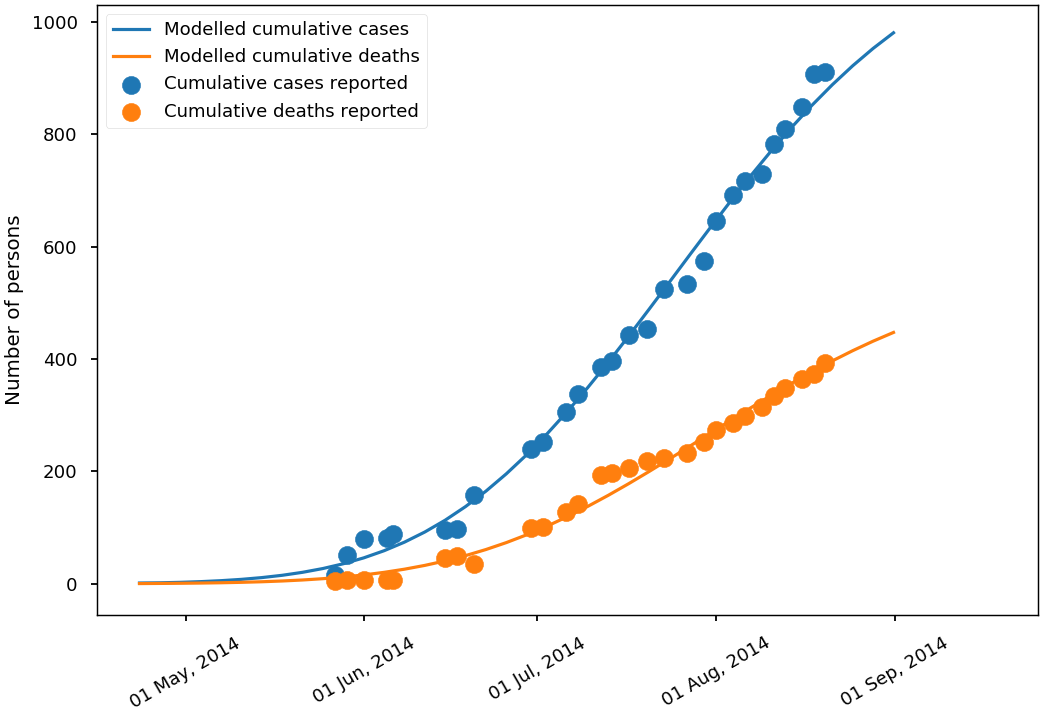

(<Figure size 800x550 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f36e56eb250>)

In [8]:
plot_model_and_raw_data(
    time_date,
    model,
    raw,
    max_model_date=dateutil.parser.parse('01 Sep 2014')
)

<IPython.core.display.Javascript object>


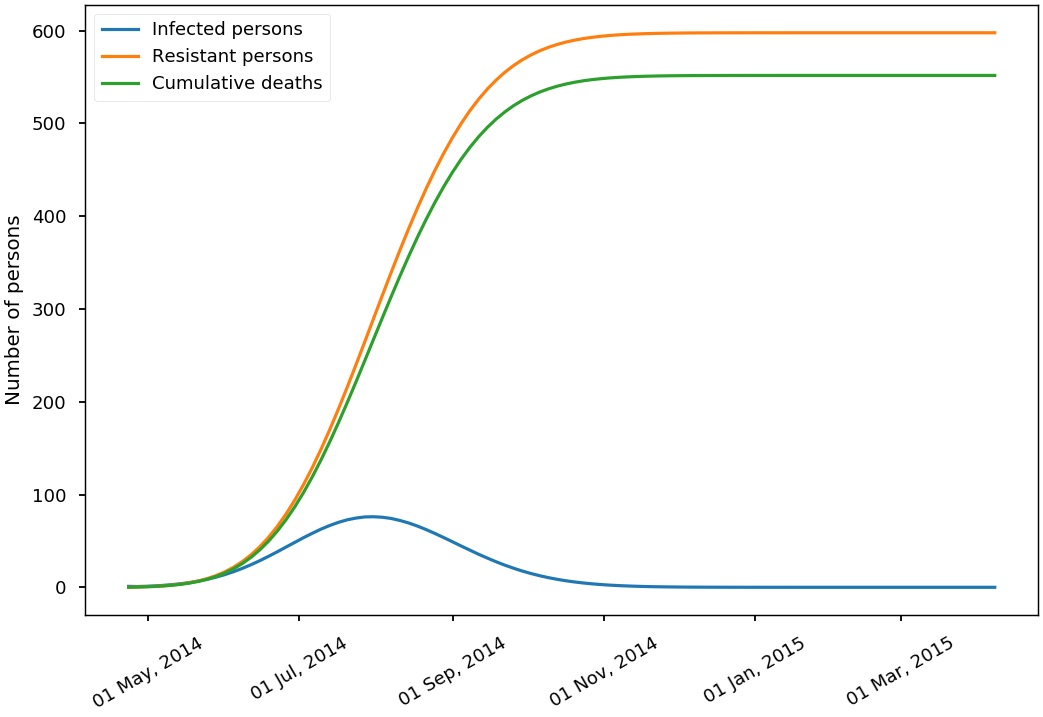

(<Figure size 800x550 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f36e3023c70>)

In [9]:
plot_model_evolution(time_date, model)

<IPython.core.display.Javascript object>


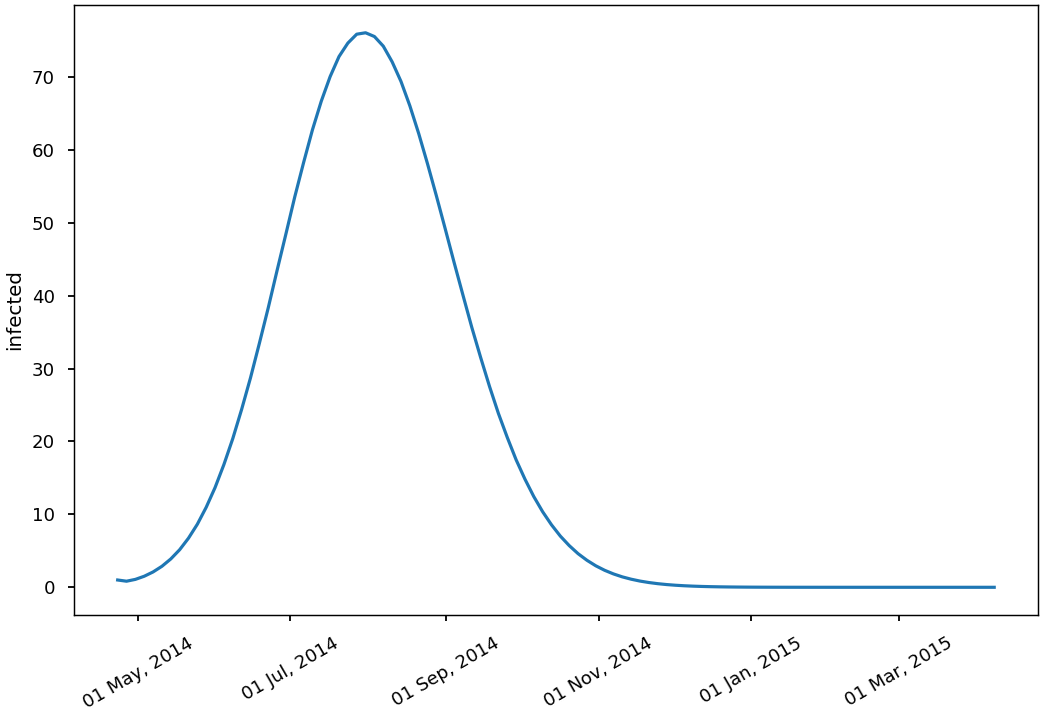

(<Figure size 800x550 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f36e11e5a90>)

In [10]:
plot_model_evolution_item(time_date, model, 'infected')